In [1]:
import numpy as np
import sys
import os
import random
import matplotlib.pyplot as plt
import math
sys.path.append('../')
os.getcwd()


from src.GridWorld import *

%load_ext autoreload
%autoreload 2

In [2]:
#Varying epsilon and Gamma for Sarsa
#Takes a long time!

def run_several(repeats,episodes,epsilon,alpha,algo):
    
    acc = np.zeros((repeats,episodes))
    for i in range(repeats):
        if algo == "sarsa":    
            V,Q,opt_pol,learning,mse,sauc = grid.SARSA_Control(epsilon = epsilon,discount = 0.2,episodes = episodes,alpha = alpha,epsilon_constant = False,alpha_constant = False)
        else:
            V,Q,opt_pol,learning,mse,sauc = grid.mc_iterative(epsilon = epsilon,discount = 0.2,episodes = episodes,alpha = alpha,epsilon_constant = False,alpha_constant = False)
        acc[i,:] = np.array(learning)
    return acc


def explore_alpha_epsilon(alphas, epsilons,repeats,discount,episodes,algo):

    fig,ax = plt.subplots(len(alphas),len(epsilons),sharex = True,sharey = True)
    
    for i,alpha in enumerate(alphas):
        
        
        for j,epsilon in enumerate(epsilons):
            
            result = run_several(repeats = repeats,episodes = episodes,epsilon = epsilon,alpha = alpha,algo = algo)
            
            ax[i,j].plot(np.linspace(0,episodes,episodes),np.mean(result,axis = 0),color = 'r')
            ax[i,j].set_title('epsilon: {}, alpha: {}'.format(epsilon, alpha))
            print("one done")
    
    fig.set_figheight(20)
    fig.set_figwidth(20)
    plt.savefig("Bigplot_alphadec_" + algo)    
    plt.show()

### Setting up the grid world

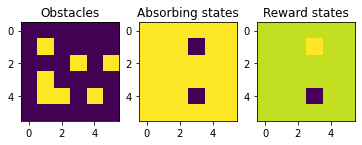

In [3]:
grid = GridWorld(p = 0.65)

## Solutions to Question 2

### This code solves questiion 2.b.

#### Question 2.b.1, 2.b.2 and 2.b.3

Credits to the LabSessions for the value iteration code. This code must be run before any later code can be run to compute the optimal value function. This is used for computing the RMSE of our estimations for MC and TD. 

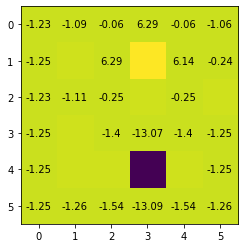

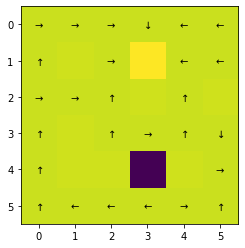

7


In [4]:
V2,opt_pol2,epochs2 = grid.value_iteration(discount = 0.2,threshold = 0.0001)
grid.draw_value(V2)
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol2[row,:]) for row in range(grid.state_size)]))
print(epochs2)

### This code solves questiion 2.c.

#### Question 2.c.1 and 2.c.2

Value function output from MC


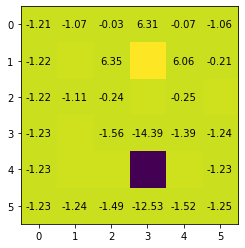

Optimal policy output from MC


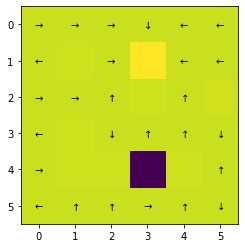

Count of how often a pair visited
[[4.0000e+02 3.0350e+03 8.9800e+02 8.1100e+02]
 [3.3000e+01 6.1400e+03 8.5000e+01 4.2000e+01]
 [1.0000e+00 1.0270e+04 1.0000e+00 4.0000e+00]
 [1.0000e+00 1.0000e+00 1.3864e+04 0.0000e+00]
 [1.0000e+00 2.0000e+00 2.0000e+00 6.4450e+03]
 [4.1000e+01 5.1000e+01 1.9400e+03 1.2120e+03]
 [1.0690e+03 9.8500e+02 1.3690e+03 2.0430e+03]
 [0.0000e+00 1.6206e+04 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 1.4386e+04]
 [1.0000e+00 1.0000e+00 1.0000e+00 4.9950e+03]
 [1.1330e+03 7.3670e+03 6.6500e+02 1.2760e+03]
 [2.7000e+01 1.0513e+04 5.7000e+01 7.4000e+01]
 [1.4222e+04 2.0000e+00 1.0000e+00 2.0000e+00]
 [9.9540e+03 4.0000e+00 2.0000e+00 2.0000e+00]
 [1.6580e+03 1.4420e+03 2.5810e+03 2.9160e+03]
 [2.0000e+00 1.0000e+00 5.7910e+03 2.6000e+01]
 [7.4220e+03 1.0000e+00 1.0000e+00 2.0000e+00]
 [4.5050e+03 7.7010e+03 5.1000e+01 2.0000e+00]
 [5.9800e+03 1.8050e+03 4.0990e+03 1.2200e+02]
 [2.1610e+03 1.6320e+03 2.

In [37]:
V3,Q3,opt_pol3,learning3,mse3,sauc3 = grid.mc_iterative(epsilon = 0.1,discount = 0.2,episodes = 50000,alpha = 0.5,epsilon_constant = False)
print("Value function output from MC")
grid.draw_value(V3)
print("Optimal policy output from MC")
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol3[row,:]) for row in range(grid.state_size)]))
print("Count of how often a pair visited")
print(sauc3)
msesave3 = mse3
learningsave3 = learning3

In [31]:
print(Q3)

[[-1.22035330e+00 -1.22034647e+00 -1.22035706e+00 -1.22036132e+00]
 [-1.07952406e+00 -1.07830322e+00 -1.07935448e+00 -1.07904662e+00]
 [-3.84367418e-01 -2.55007593e-01 -2.78626163e-02 -5.06444638e-01]
 [ 2.37725819e-01 -1.78920938e-01  6.36566735e+00  4.19698512e-01]
 [-5.31713656e-01 -5.67753896e-01 -5.30174940e-01 -7.17913428e-02]
 [-1.05608977e+00 -1.05613156e+00 -1.05432837e+00 -1.05383053e+00]
 [-1.22755093e+00 -1.22755571e+00 -1.22755149e+00 -1.22755017e+00]
 [ 2.62990367e-01  6.35950447e+00 -1.34506887e-01 -1.64356704e-01]
 [ 1.24924659e-01  3.24278650e-01  7.44946419e-01  6.07652716e-01]
 [-2.78452454e-01 -2.35368777e-01  3.51897510e-01  6.09767354e+00]
 [-7.60824772e-01 -7.18920713e-01 -7.70532686e-01 -2.44054179e-01]
 [-1.22361035e+00 -1.22360138e+00 -1.22361166e+00 -1.22361038e+00]
 [-1.11284517e+00 -1.11187060e+00 -1.11286546e+00 -1.11222612e+00]
 [-2.44848489e-01 -8.54402871e-01 -8.65640447e-01 -8.55113576e-01]
 [-2.54681506e-01 -3.22391437e-01 -5.27120876e-01 -4.71386960e

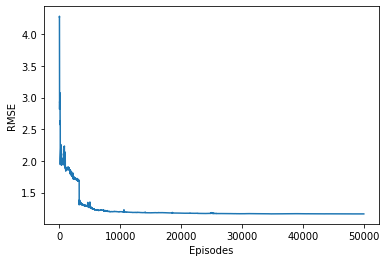

In [23]:
plt.plot(mse3)
plt.xlabel("Episodes")
plt.ylabel("RMSE")
plt.show()

#### Question 2.c.3

Plotting learning curve from our MC algorithm


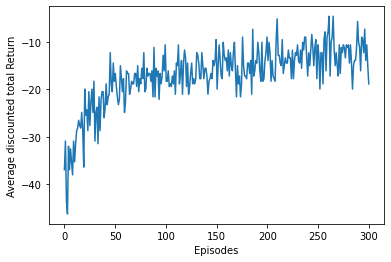

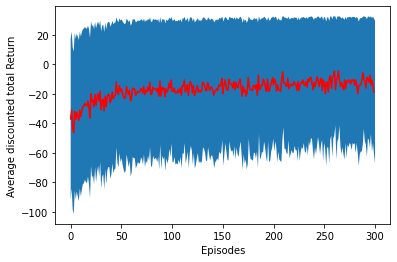

In [7]:
repeats = 200
episodes = 300
acc3 = np.zeros((repeats,episodes))
for i in range(repeats):
    V3,Q3,opt_pol3,learning3,mse3,sauc3 = grid.mc_iterative(epsilon = 0.1,discount = 0.2,episodes = episodes,alpha = 0.5,epsilon_constant = False)
    acc3[i,:] = np.array(learning3)

print("Plotting learning curve from our MC algorithm")
plt.plot(np.linspace(0,episodes,episodes),np.mean(acc3,axis = 0))
plt.xlabel("Episodes")
plt.ylabel("Average discounted total Return")
plt.show()

plt.plot(np.mean(acc3,axis = 0),color = 'r')
plt.fill_between(np.linspace(0,episodes,episodes),np.mean(acc3,axis = 0) - np.std(acc3,axis = 0),np.mean(acc3,axis = 0) + np.std(acc3,axis = 0))
plt.xlabel("Episodes")
plt.ylabel("Average discounted total Return")
plt.show()

In [ ]:
#Search for good result:
alphas = [1,0.5,0.1,0.01]
epsilons = [1,0.1,0.01,0.001]
discount = 0.2

for i,alpha in enumerate(alphas):
    
    for j, epsilon in enumerate(epsilons):
        
        _,_,opt_pol_X,_,_,_ = grid.mc_iterative(epsilon = epsilon,discount = 0.2,episodes = 50000,alpha = alpha,epsilon_constant = False)
        
        if np.array_equal(opt_pol_X,opt_pol3):
            print("Success with epsilon {} & alpha {}".format(epsilon,alpha))
        else:
            print("nope")


#### Question 2.c.4

one done
one done
one done
one done
one done
one done
one done
one done
one done
one done
one done
one done
one done
one done
one done
one done


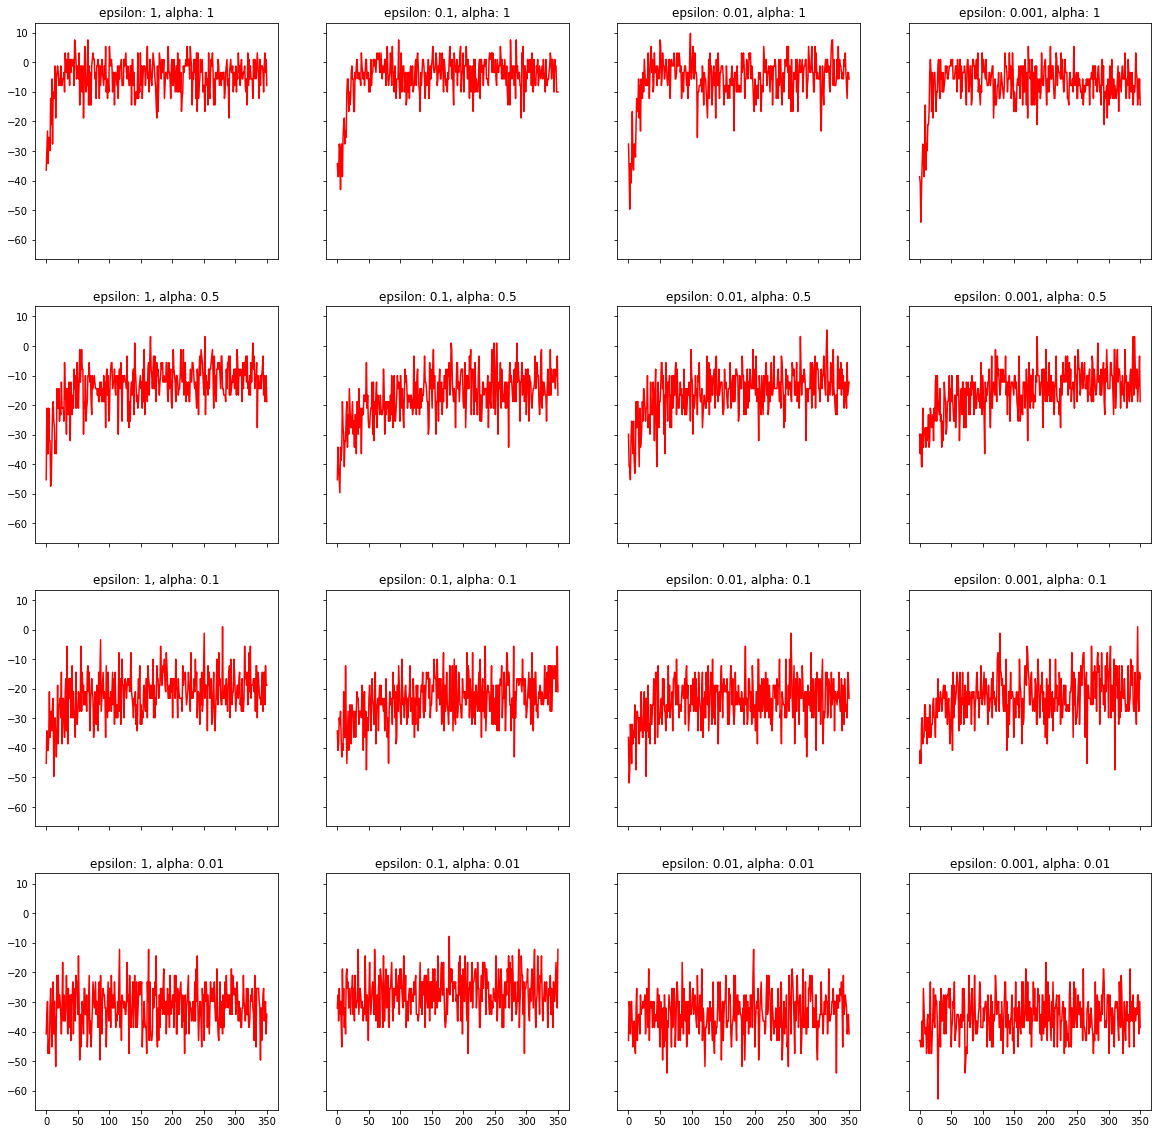

In [19]:
#Varying epsilon and Gamma for MC
#Takes a long time
    
alphas = [1,0.5,0.1,0.01]
epsilons = [1,0.1,0.01,0.001]
discount = 0.2
episodes = 350
repeats = 50

explore_alpha_epsilon(alphas,epsilons,repeats,discount,episodes,"mc")

### This code solves questiion 2.d. 

#### Question 2.d.1 and 2.d.2

Value function output from MC


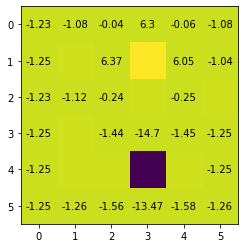

Optimal policy output from MC


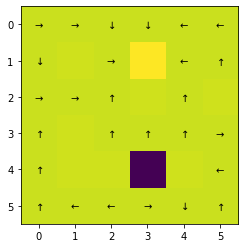

Count of how often a pair visited
[[6.3000e+01 3.7580e+03 9.6000e+01 8.0000e+01]
 [9.0000e+00 5.7940e+03 7.0000e+00 4.0000e+00]
 [1.0000e+01 1.0000e+00 8.8390e+03 1.0000e+00]
 [3.0000e+00 2.0000e+00 7.3350e+03 0.0000e+00]
 [4.0000e+00 2.0000e+00 2.0000e+00 7.0630e+03]
 [3.0000e+00 7.0000e+00 9.0000e+00 5.0630e+03]
 [1.4850e+03 9.4700e+02 1.8410e+03 6.5400e+02]
 [4.0000e+00 1.9857e+04 3.0000e+00 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [3.0000e+00 1.0000e+00 2.0000e+00 8.5370e+03]
 [3.2560e+03 6.5000e+01 6.0000e+00 3.0000e+00]
 [2.0700e+02 1.1241e+04 3.6600e+02 1.2200e+02]
 [3.8000e+01 1.3600e+04 5.4000e+01 5.8000e+01]
 [1.6707e+04 1.6000e+01 4.4500e+02 3.4300e+02]
 [9.6650e+03 2.0000e+00 1.0000e+00 6.0000e+00]
 [8.8710e+03 1.3430e+03 1.6300e+03 2.9570e+03]
 [4.9640e+03 1.6000e+01 1.4900e+02 1.0200e+02]
 [6.9970e+03 5.9000e+01 1.0000e+00 2.0000e+00]
 [8.3970e+03 3.8000e+01 1.4000e+01 5.0000e+00]
 [9.1970e+03 3.6210e+03 2.5261e+04 1.3400e+02]
 [7.2200e+03 1.0767e+04 1.

In [26]:
V4,Q4,opt_pol4,learning4,mse4,sauc4 = grid.SARSA_Control(epsilon = 0.75,discount = 0.2,episodes = 25000,alpha = 0.95,epsilon_constant = False)
print("Value function output from MC")
grid.draw_value(V4)
print("Optimal policy output from MC")
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol4[row,:]) for row in range(grid.state_size)]))
print("Count of how often a pair visited")
print(sauc4)
msesave4 = mse4
learningsave4 = learning4

In [27]:
print(Q4)

[[-1.22753687e+00 -1.22720148e+00 -1.22746687e+00 -1.22723127e+00]
 [-1.11916663e+00 -1.08459397e+00 -1.11641732e+00 -1.14121696e+00]
 [-7.52803437e-01 -1.09005673e+00 -4.35785583e-02 -9.20959278e-01]
 [-3.19189011e-01 -1.01231257e+00  6.30338261e+00  4.39172302e-01]
 [-9.32346513e-01 -9.19092682e-01 -7.98392770e-01 -6.03796582e-02]
 [-1.15942088e+00 -1.11229897e+00 -1.11065074e+00 -1.08006175e+00]
 [-1.24592488e+00 -1.24592411e+00 -1.24592295e+00 -1.24592607e+00]
 [-1.00078979e+00  6.36612266e+00 -9.46015634e-01 -9.55555064e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.09672094e+00 -1.06943856e+00 -7.72962142e-01  6.04754588e+00]
 [-1.03855817e+00 -1.08095822e+00 -1.12861140e+00 -1.15788495e+00]
 [-1.23994169e+00 -1.23384431e+00 -1.23997296e+00 -1.23996418e+00]
 [-1.21554381e+00 -1.11735953e+00 -1.21517064e+00 -1.21550450e+00]
 [-2.39074201e-01 -1.07519275e+00 -1.05631693e+00 -1.03822612e+00]
 [-2.53162130e-01 -9.46852799e-01 -1.13361224e+00 -6.42718360e

In [ ]:
#Search for good result:
alphas = [1,0.95,0.9,0.85,0.8,0.75,0.7]
epsilons = [1,0.75,0.5,0.25]
discount = 0.2
Vs = np.zeros((len(alphas),len(epsilons)))
pols = np.zeros((len(alphas),len(epsilons)))

for i,alpha in enumerate(alphas):
    
    for j, epsilon in enumerate(epsilons):
        
        V_x,_,opt_pol_X,_,_,_ = grid.SARSA_Control(epsilon = epsilon,discount = 0.2,episodes = 30000,alpha = alpha,epsilon_constant = False)
        Vs[i,j] = math.sqrt(((V_x - V2)**2).mean(axis=None))
        pols[i,j] = np.sum(opt_pol_X == opt_pol2)
        if np.array_equal(opt_pol_X,opt_pol2):
            print("Success with epsilon {} & alpha {}".format(epsilon,alpha))
        else:
            print("nope")

nope
nope
nope
nope
nope
nope
nope
nope


In [24]:
alphas = [1,0.95,0.9,0.85,0.8,0.75,0.7]
epsilons = [1,0.75,0.5,0.25,0.1]

In [31]:
print(pols)

[[ 98.  92.  92.  96.]
 [100. 102. 102. 106.]
 [102. 106. 104.  96.]
 [100.  98.  96.  98.]
 [100. 102. 104.  94.]
 [ 98.  94. 100. 110.]
 [104.  98. 104. 100.]]


In [19]:
print(Vs)

[[0.14871599 1.17170702 0.28153566 0.12630898 0.25922203 1.13822941
  1.19925354]
 [0.29539703 0.52047429 1.62977814 0.160702   0.13037304 0.23642524
  0.16112753]
 [1.19549436 1.16909059 0.32277996 1.15370847 1.16123894 1.17306378
  0.31063843]
 [0.34918688 0.38962935 1.16186955 0.11535701 1.19414231 0.32904981
  1.17438533]
 [0.11643215 0.36670656 0.24594011 0.19196182 1.14200194 1.11456363
  0.30214417]
 [0.28076266 0.0908852  0.20503836 0.3169975  1.17179774 0.3063048
  1.67528619]
 [0.36071477 0.12447643 1.63047411 1.14580928 1.16648005 1.07605386
  1.61785388]]


In [12]:
opt_pol2.shape

(29, 4)

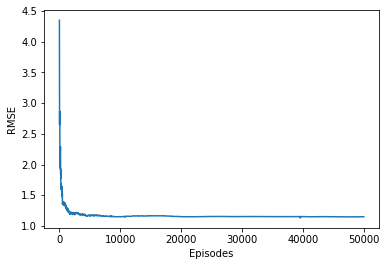

In [31]:
plt.plot(mse4)
plt.xlabel("Episodes")
plt.ylabel("RMSE")
plt.show()

#### Question 2.d.3

Plotting learning curve from our TD algorithm


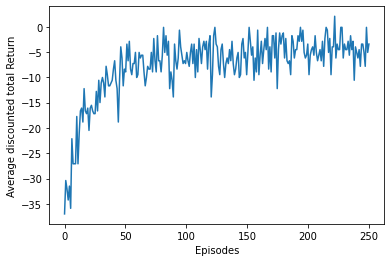

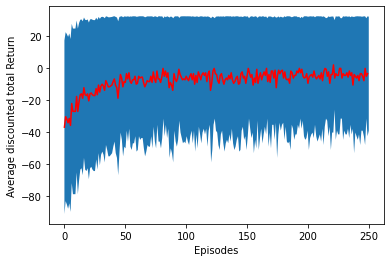

In [32]:
repeats = 200
episodes = 250
acc4 = np.zeros((repeats,episodes))
for i in range(repeats):
    V4,Q4,opt_pol4,learning4,mse4,sauc4 = grid.SARSA_Control(epsilon = 0.1,discount = 0.2,episodes = episodes,alpha = 0.5,epsilon_constant = False)
    acc4[i,:] = np.array(learning4)

print("Plotting learning curve from our TD algorithm")
plt.plot(np.linspace(0,episodes,episodes),np.mean(acc4,axis = 0))
plt.xlabel("Episodes")
plt.ylabel("Average discounted total Return")
plt.show()

plt.plot(np.mean(acc4,axis = 0),color = 'r')
plt.fill_between(np.linspace(0,episodes,episodes),np.mean(acc4,axis = 0) - np.std(acc4,axis = 0),np.mean(acc4,axis = 0) + np.std(acc4,axis = 0))
plt.xlabel("Episodes")
plt.ylabel("Average discounted total Return")
plt.show()

#### Question 2.d.4.:

In [20]:
#Varying epsilon and Gamma for Sarsa
#Takes a long time
    
alphas = [1,0.5,0.1,0.01]
epsilons = [1,0.1,0.01,0.001]
discount = 0.2
episodes = 350
repeats = 50

explore_alpha_epsilon(alphas,epsilons,repeats,discount,episodes,"sarsa")

../src/GridWorld.py:718: RuntimeWarning: overflow encountered in double_scalars
  alph = alpha if alpha_constant else alpha / (2 ** state_action_upt_ctr[state_id,action])


one done


../src/GridWorld.py:718: RuntimeWarning: overflow encountered in double_scalars
  alph = alpha if alpha_constant else alpha / (2 ** state_action_upt_ctr[state_id,action])


one done


../src/GridWorld.py:718: RuntimeWarning: overflow encountered in double_scalars
  alph = alpha if alpha_constant else alpha / (2 ** state_action_upt_ctr[state_id,action])


one done


../src/GridWorld.py:718: RuntimeWarning: overflow encountered in double_scalars
  alph = alpha if alpha_constant else alpha / (2 ** state_action_upt_ctr[state_id,action])


one done


../src/GridWorld.py:718: RuntimeWarning: overflow encountered in double_scalars
  alph = alpha if alpha_constant else alpha / (2 ** state_action_upt_ctr[state_id,action])


one done


../src/GridWorld.py:718: RuntimeWarning: overflow encountered in double_scalars
  alph = alpha if alpha_constant else alpha / (2 ** state_action_upt_ctr[state_id,action])


one done


../src/GridWorld.py:718: RuntimeWarning: overflow encountered in double_scalars
  alph = alpha if alpha_constant else alpha / (2 ** state_action_upt_ctr[state_id,action])


one done


../src/GridWorld.py:718: RuntimeWarning: overflow encountered in double_scalars
  alph = alpha if alpha_constant else alpha / (2 ** state_action_upt_ctr[state_id,action])


one done


../src/GridWorld.py:718: RuntimeWarning: overflow encountered in double_scalars
  alph = alpha if alpha_constant else alpha / (2 ** state_action_upt_ctr[state_id,action])


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7feffba09940> (for post_execute):


KeyboardInterrupt: 

### This code solves questiion 2.e.

#### Question 2.e.1.:

Plotting RMSE agains episodes for both MC and TD


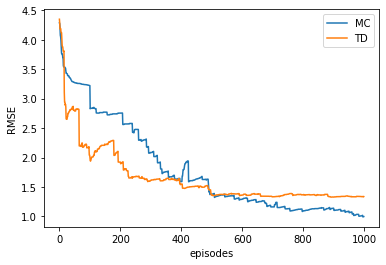

In [36]:
print("Plotting RMSE agains episodes for both MC and TD")
plt.plot(msesave3[:1000],label = 'MC')
plt.plot(msesave4[:1000],label = 'TD')
plt.xlabel("episodes")
plt.ylabel("RMSE")
plt.legend()
plt.show()

#### Question 2.e.2.:

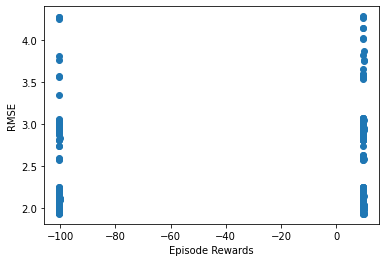

In [27]:
plt.scatter(learningsave3[:500],msesave3[:500])
plt.xlabel("Episode Rewards")
plt.ylabel("RMSE")
plt.show()

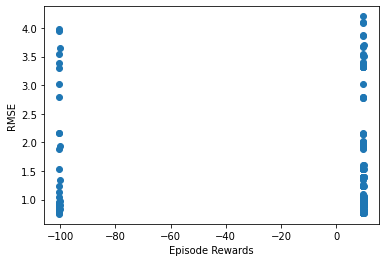

In [28]:
plt.scatter(learningsave4[:500],msesave4[:500])
plt.xlabel("Episode Rewards")
plt.ylabel("RMSE")
plt.show()

In [16]:
### Some playing around for testing
policy = grid.policy_setup()
#Adjust trace = grid.get_trace(policy)
print(trace)
lists = {}
grid.create_lists(trace,lists)
print(lists)
grid.discount_rewards(lists,0.2)

NameError: name 'trace' is not defined